In [147]:
#Graham Fraser, Assignment#2, stu id: 302364.

%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Part 1: data structures

There are two\* main structures in `pandas`: Series (1-dimensional labeled array) and DataFrame (2-dimensional labeled structure).


\* there is also a TimeSeries (a flavor of Series that contains datetimes), Panel (3-dimensional), and Panel4D (4-dimensional). The last two are 'less used,' according to the docs. I haven't experimented with them yet.

### Series (1D)

Series can hold any data type, and the axis label is called an index. Series is dict-like in that you can get and set values by index label. 

In [156]:
#Chg: Add a few basic functions, modify the series values. Series = a one dimensional arrays
s1 = pd.Series(['a', 15.5, 23, -5, np.nan, 0.25, 125, '\t', '\n', 125/15])
print s1
print "\n" #Print a blank line

#Basic stats
print 'Length:'
print len(s1)

print '\nMax:'
print max(s1)

print '\nMin:'
print min(s1)

0       a
1    15.5
2      23
3      -5
4     NaN
5    0.25
6     125
7      \t
8      \n
9       8
dtype: object


Length:
10

Max:
a

Min:
-5


In [150]:
# by default (without specifying them explicitly), the index label is just an int
s1[5]

0.25

### DataFrame (2D)

Columns can be of different data types. Index and column names are optional. If individual Series have different indexes, the DataFrame index will be the union of the individual ones.

Can create from:

- dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Series

- another DataFrame


N.B.: there are other helper methods for constructing DataFrames from varying data types; [see the docs](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#alternate-constructors) for more options.

In [151]:
# Chg: Add one more Series called s4. Will also rename the dataframe variables below:
s2, s3, s4 = pd.Series(np.random.randn(10)), pd.Series(np.random.randn(10)), pd.Series(np.random.randn(10))

In [152]:
# Chg: Add s4 as a new column 'd' to the table. Has same length as the others.
table1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3, 'D': s4})

table1

,A,B,C,D
0,a,-1.722921,-0.257714,0.290443
1,15.5,1.444722,-1.060540,-0.069865
2,23,0.712425,2.428379,-0.673144
3,-5,-0.310437,0.347688,-0.397642
4,NaN,0.418355,-1.026069,-0.935274
5,0.25,1.161593,-1.121379,0.458576
6,125,-2.096130,-0.975814,-0.199547
7,\t,-1.359487,-1.813889,-1.351916
8,\n,-0.110772,-1.335801,-0.302257
9,8,-0.664114,-0.247184,-0.252756


In [32]:
# Chg: Add a new column, and use fewer numbers in the randn function.
#When Series are different lengths, DataFrame fills in gaps with NaN
s5 = pd.Series(np.random.randn(5))  # whoaaaaaa this Series has extra entries!

df1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3, 'D': s4, 'E': s5})

df1 

,A,B,C,D,E
0,a,0.282193,0.917809,0.163849,0.083123
1,15.5,-0.597557,-0.897601,0.544180,0.345820
2,23,-0.012650,-0.058411,-1.012444,0.605422
3,-5,1.625116,-1.127465,-1.079421,-0.332071
4,NaN,-0.055439,-0.638432,-0.294950,-1.402397
5,0.25,-0.424668,0.869493,1.200353,NaN
6,125,-2.325149,2.418369,0.171280,NaN
7,\t,0.678230,-0.524026,2.003820,NaN
8,\n,-1.705502,-1.068899,0.832267,NaN
9,8,0.343283,0.108636,-1.402003,NaN


In [37]:
# Chg: Modified the number of rows and columns in the dataframe. Create a DataFrame from numpy array
table2 = pd.DataFrame(np.random.randn(8,5))

table2           # can only have one 'pretty' output per cell (if it's the last command)

print table1       # otherwise, can print arb number of results w/o pretty format
print table2       # (uncomment both of these print statements)

      A         B         C         D
0     a  0.282193  0.917809  0.163849
1  15.5 -0.597557 -0.897601  0.544180
2    23 -0.012650 -0.058411 -1.012444
3    -5  1.625116 -1.127465 -1.079421
4   NaN -0.055439 -0.638432 -0.294950
5  0.25 -0.424668  0.869493  1.200353
6   125 -2.325149  2.418369  0.171280
7    \t  0.678230 -0.524026  2.003820
8    \n -1.705502 -1.068899  0.832267
9     8  0.343283  0.108636 -1.402003
          0         1         2         3         4
0  0.888470  0.347130 -0.259593  0.898785  0.673019
1 -0.102439  0.541437  0.528133 -0.152166 -0.249165
2  0.206701  0.195911  1.130301  0.496922 -0.813253
3 -0.505006 -0.693743 -1.260263  0.830958  0.222947
4 -0.894638  0.442351  2.781807 -0.701677 -1.417712
5 -0.092674 -1.001284 -0.025729 -1.258023 -0.459530
6  0.036160  1.340827  2.150656 -0.988544  1.852407
7 -0.390253  1.056709 -0.812455 -0.320108  0.073974


Can inspect your DataFrames with head() and tail() methods - takes a number of lines as an argument. 

Without specifiying them, DataFrames have default index and column name attributes.

In [39]:
# Chg: Retrieve more rows. Recall current dataframe 
table2.head(5)

,0,1,2,3,4
0,0.888470,0.347130,-0.259593,0.898785,0.673019
1,-0.102439,0.541437,0.528133,-0.152166,-0.249165
2,0.206701,0.195911,1.130301,0.496922,-0.813253
3,-0.505006,-0.693743,-1.260263,0.830958,0.222947
4,-0.894638,0.442351,2.781807,-0.701677,-1.417712


But you can assign to those attributes of the DataFrame...

In [53]:
#chg column and variable names, as well as the data format. 
namedCols = ['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5']

# assign columns attribute (names) 
table2.columns = namedCols

# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dateIndex = pd.date_range(start='2018-01-15', freq='m', periods=8)
table2.index = dateIndex

table2

,Column 1,Column 2,Column 3,Column 4,Column 5
2018-01-31,0.888470,0.347130,-0.259593,0.898785,0.673019
2018-02-28,-0.102439,0.541437,0.528133,-0.152166,-0.249165
2018-03-31,0.206701,0.195911,1.130301,0.496922,-0.813253
2018-04-30,-0.505006,-0.693743,-1.260263,0.830958,0.222947
2018-05-31,-0.894638,0.442351,2.781807,-0.701677,-1.417712
2018-06-30,-0.092674,-1.001284,-0.025729,-1.258023,-0.459530
2018-07-31,0.036160,1.340827,2.150656,-0.988544,1.852407
2018-08-31,-0.390253,1.056709,-0.812455,-0.320108,0.073974


In [54]:
# Chg date format. An aside: inspecting the dates object...
print 'what is a date_range object?\n\n', dateIndex

what is a date_range object?

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', freq='M')


Do some indexing / subsetting...

In [57]:
# select a row by index label by using .loc 
table2.loc['2018-05-31']

Column 1   -0.894638
Column 2    0.442351
Column 3    2.781807
Column 4   -0.701677
Column 5   -1.417712
Name: 2018-05-31 00:00:00, dtype: float64

In [73]:
# Chg cell printed and round the value. ALso insert an if statement. Select a single element
tb2Col5 = table2.loc['2018-05-31','Column 5']
print round(tb2Col5, 5)

if (tb2Col5 < 0):
 print '\nCell has a negative value.'
else:
 print '\nCell has a postive value.'

-1.41771

Cell has a negative value.


In [87]:
# Chg index and column names. COlumn names and index values can only have a lenghg of 1 with these attributes. 
# New dataframe with random numbers
tb3 = pd.DataFrame(np.random.randn(5,6), index=list('12345'),columns=list('abcdef'))

tb3

,a,b,c,d,e,f
1,0.347283,0.035671,-0.037996,-0.519651,-2.254739,-1.088969
2,0.694686,-0.308097,0.978663,-1.337281,1.531805,-0.523451
3,-0.273966,0.310194,0.350929,1.982763,-0.043425,0.351128
4,1.061425,-0.546646,-1.273084,-0.290029,-1.221123,0.173160
5,-1.674640,-0.651596,1.553075,1.982968,-0.126100,0.525650


In [88]:
#Chg: Adjust the rows and columns retrieved. Address two separate rows, and a range of three columns
df1.loc[['3','5'],'e':'f']

,e,f
3,1.073406,0.431157
5,0.455041,0.642509


## part 2: data

In the `data/` directory is the sample of parsed twitter data that floats around with gnacs. To create the string of column names, I just used the explain option with all other options.

In [9]:
#Chg: Column and variable names.
twitter_x = "Twitter ID|Post Time|Content|Filler|['twitter:urls']|['Filler']|['actor:languages']|twitLang|Lang|[u'geo:coordinates_list-items']|geo:type|Filler|Filler|Filler|Filler|actor:utcOffset|Filler|Filler|Filler|Filler|Filler|Filler|Filler|Filler|Filler|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCnt|actor:friendsCnt|actor:listedCnt|actor:statusesCnt|Tweet|Filler|Filler|Filler"
columnNames = twitter_x.split('|')

In [10]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# Get some data, inspect
twitter1 = pd.read_csv('./twitter_sample.csv', sep='|', names=columnNames)

twitter1.tail(3)

,Twitter ID,Post Time,Content,Filler,['twitter:urls'],['Filler'],['actor:languages'],twitLang,Lang,[u'geo:coordinates_list-items'],geo:type,Filler.1,Filler.2,Filler.3,Filler.4,actor:utcOffset,Filler.5,Filler.6,Filler.7,Filler.8,Filler.9,Filler.10,Filler.11,Filler.12,Filler.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCnt,actor:friendsCnt,actor:listedCnt,actor:statusesCnt,Tweet,Filler.14,Filler.15,Filler.16
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


Since there are so many explain fields that come back with 'None', let's just get rid of them for now. 

(In the future, we might try to find a way to make that field more descriptive, too.)

In [250]:
# Chg: Replace 'none' with 'filler'.
print twitter1.columns
print twitter1.drop( [u'Filler.5', u'Filler.6', u'Filler.7', u'Filler.8', u'Filler.9', u'Filler.10',
       u'Filler.11', u'Filler.12', u'Filler.13'],axis=1).columns


Index([u'Twitter ID', u'Post Time', u'Content', u'Filler', u'['twitter:urls']',
       u'['Filler']', u'['actor:languages']', u'twitLang', u'Lang',
       u'[u'geo:coordinates_list-items']', u'geo:type', u'Filler.1',
       u'Filler.2', u'Filler.3', u'Filler.4', u'actor:utcOffset', u'Filler.5',
       u'Filler.6', u'Filler.7', u'Filler.8', u'Filler.9', u'Filler.10',
       u'Filler.11', u'Filler.12', u'Filler.13', u'actor:displayName',
       u'actor:preferredUsername', u'actor:id', u'gnip:klout_score',
       u'actor:followersCnt', u'actor:friendsCnt', u'actor:listedCnt',
       u'actor:statusesCnt', u'Tweet', u'Filler.14', u'Filler.15',
       u'Filler.16'],
      dtype='object')
Index([u'Twitter ID', u'Post Time', u'Content', u'Filler', u'['twitter:urls']',
       u'['Filler']', u'['actor:languages']', u'twitLang', u'Lang',
       u'[u'geo:coordinates_list-items']', u'geo:type', u'Filler.1',
       u'Filler.2', u'Filler.3', u'Filler.4', u'actor:utcOffset',
       u'actor:displayName

In [251]:
# View last few records
twitter1.tail(3)

,Twitter ID,Post Time,Content,Filler,['twitter:urls'],['Filler'],['actor:languages'],twitLang,Lang,[u'geo:coordinates_list-items'],geo:type,Filler.1,Filler.2,Filler.3,Filler.4,actor:utcOffset,Filler.5,Filler.6,Filler.7,Filler.8,Filler.9,Filler.10,Filler.11,Filler.12,Filler.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCnt,actor:friendsCnt,actor:listedCnt,actor:statusesCnt,Tweet,Filler.14,Filler.15,Filler.16
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


## slicing & combining

Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.

In [343]:
# Retrieve 'French' instead. Inspect those rows with twitter-classified lang 'fr' (scroll the right to see)
twitter1[twitter1.twitLang == 'fr'].head()

# the colons in the column name below won't allow dot-access to the column, so we can quote them and still filter.
#twitter1[twitter1["gnip:language:value"] == 'en'].head()

,Twitter ID,Post Time,Content,Filler,['twitter:urls'],['Filler'],['actor:languages'],twitLang,Lang,[u'geo:coordinates_list-items'],geo:type,Filler.1,Filler.2,Filler.3,Filler.4,actor:utcOffset,Filler.5,Filler.6,Filler.7,Filler.8,Filler.9,Filler.10,Filler.11,Filler.12,Filler.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCnt,actor:friendsCnt,actor:listedCnt,actor:statusesCnt,Tweet,Filler.14,Filler.15,Filler.16
56,"tag:search.twitter.com,2005:351835319945019393",2013-07-01T22:50:51.000Z,J'vais pas faire comme Yass un montage de dép,None,None,None,['fr'],fr,fr,"[48.97273529, 2.27965733]",Point,"['[2.2711327, 48.9584561]', '[2.2711327, 48.97...",Polygon,"Saint-Gratien, Val-d'Oise",FR,None,None,None,None,None,None,None,None,None,None,NeyNey. ✌,MarviiinC,1357848218,42,79,70,0,4488,Tweet,None,None,None


Let's get a subset of this dataframe that has numerical values so we can eventually do some stuff.

In [59]:
# create new dataframe from numerical columns
df3 = twitter1[["gnip:klout_score","actor:followersCnt", "actor:friendsCnt", "actor:listedCnt"]]
df3.head(5)

,gnip:klout_score,actor:followersCnt,actor:friendsCnt,actor:listedCnt
0,35,178,129,0
1,32,144,215,0
2,18,37,54,0
3,50,438,174,1
4,21,12,6,0


In [60]:
# because I happen to know the answer, let's check data types of the columns...
df3.dtypes

gnip:klout_score      object
actor:followersCnt     int64
actor:friendsCnt       int64
actor:listedCnt        int64
dtype: object

The `object` type means that the column has multiple types of data in it. This is a good opportunity to 'fix' a section of the DataFrame by way of a function & the `map()` function

In [12]:
# Chg: Alter if statement. Convert ints / strings to floats, give up on anything else (call it 0.0)
def toFloat(num):
    if num != None or num != 'None':
       return float(num)
    else:
       return 0.0

In [99]:
# Use try - except given many exceptions, including 'ValueError: could not convert string to float: None'
#df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify) [original]
    
try:
  df3.is_copy = False #supress warning msg
  df3['gnip:klout_score'] = df3['gnip:klout_score'].map(toFloat)
  # check again
  print df3.dtypes

except ValueError:
  print("Conversion issue has occurred.")

except:
  print("Another issue has occurred.")    


gnip:klout_score      float64
actor:followersCnt      int64
actor:friendsCnt        int64
actor:listedCnt         int64
dtype: object


In [100]:
# Use try - except after receiving many errors, including 'ValueError'. Use all floats 
try:
  df3['gnip:klout_score'] = df3['gnip:klout_score'].astype(float)
  print df3.dtypes

except ValueError:
  print ("Conversion error has occurred.")

except:
  print("Another issue has occurred.")  

gnip:klout_score      float64
actor:followersCnt      int64
actor:friendsCnt        int64
actor:listedCnt         int64
dtype: object


Since they're all numbers now, we can do math and also add new columns to the DataFrame. Combining values from separate columns occurs on a row-by-row basis, as expected.

In [103]:
# look at some activity ratios - add col to df
df3['fol/fr'] = df3['gnip:klout_score'] / df3['actor:followersCnt']

df3.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
df3.describe()

,gnip:klout_score,actor:followersCnt,actor:friendsCnt,actor:listedCnt,fol/fr
count,95.000000,95.000000,95.000000,95.000000,94.000000
mean,37.842105,1062.747368,442.747368,7.494737,0.224291
std,9.907354,4345.287974,609.239375,50.270306,0.251564
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,149.500000,125.500000,0.000000,0.066096
50%,39.000000,243.000000,231.000000,0.000000,0.153499
75%,43.000000,514.500000,436.500000,1.000000,0.271652
max,64.000000,40543.000000,3802.000000,486.000000,1.750000


## grouping

groupby() is used for the split-apply-combine process. I'm led to believe that this is one of the stronger aspects of `pandas`' approach to DataFrames (versus R's), but haven't yet had a chance to really see the power.

In [104]:
# back to bigger df, without 'None' cols
twitter1.head()

,Twitter ID,Post Time,Content,Filler,['twitter:urls'],['Filler'],['actor:languages'],twitLang,Lang,[u'geo:coordinates_list-items'],geo:type,Filler.1,Filler.2,Filler.3,Filler.4,actor:utcOffset,Filler.5,Filler.6,Filler.7,Filler.8,Filler.9,Filler.10,Filler.11,Filler.12,Filler.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCnt,actor:friendsCnt,actor:listedCnt,actor:statusesCnt,Tweet,Filler.14,Filler.15,Filler.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


Use a groupby to collect all rows by language value, and subsequently use some of the methods available to `GroupBy` DataFrames. Note that the `GroupBy` methods will only act on (and the method call only return) values for columns where numerical calculation makes sense.

In [16]:
# Chg: Retrieve over 5,000, rename variables, and set original dataframe's field to a float.
# subset df, create new df with only 'popular' accounts -- those matching the filter condition given
best = twitter1[twitter1["actor:followersCnt"] > 5000]
print best

# fix the klout scores again
best.is_copy = False #suppress warning msg
best['gnip:klout_score'] = best['gnip:klout_score'].map(toFloat)
print "\ngnip:klout_score is now a float64: "
print best['gnip:klout_score'].dtypes #gnip:klout_score is now a float64.

# chg: View the dataframe -- just a few rows: 
best.head(3)

                                        Twitter ID                 Post Time  \
10  tag:search.twitter.com,2005:351835318044983298  2013-07-01T22:50:51.000Z   
12  tag:search.twitter.com,2005:351835318497980416  2013-07-01T22:50:51.000Z   
19  tag:search.twitter.com,2005:351835319085187072  2013-07-01T22:50:51.000Z   
90  tag:search.twitter.com,2005:351835321081659392  2013-07-01T22:50:51.000Z   

                                              Content Filler ['twitter:urls']  \
10                   @DiegoSanRoman no y no me gusta.   None             None   
12  Rubbing/massaging my feet is like giving me he...   None             None   
19                        @Michael5SOS MIKEY I LOVE U   None             None   
90  @xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...   None             None   

   ['Filler'] ['actor:languages'] twitLang Lang  \
10       None              ['en']       en   es   
12       None              ['en']       en   en   
19       None              ['it']       

,Twitter ID,Post Time,Content,Filler,['twitter:urls'],['Filler'],['actor:languages'],twitLang,Lang,[u'geo:coordinates_list-items'],geo:type,Filler.1,Filler.2,Filler.3,Filler.4,actor:utcOffset,Filler.5,Filler.6,Filler.7,Filler.8,Filler.9,Filler.10,Filler.11,Filler.12,Filler.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCnt,actor:friendsCnt,actor:listedCnt,actor:statusesCnt,Tweet,Filler.14,Filler.15,Filler.16
10,"tag:search.twitter.com,2005:351835318044983298",2013-07-01T22:50:51.000Z,@DiegoSanRoman no y no me gusta.,None,None,None,['en'],en,es,"[19.34964, -99.19341]",Point,"['[-99.32437499999999, 19.232228]', '[-99.3243...",Polygon,"Álvaro Obregón, Distrito Federal",MX,-28800,None,None,None,None,None,None,None,None,None,Carlos Hermosillo,CHermosillo_FOX,1160945754,62.0,11873,69,56,1991,Reply,http://twitter.com/DiegoSanRoman/statuses/3515...,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64.0,40543,116,486,60465,Tweet,None,None,None
19,"tag:search.twitter.com,2005:351835319085187072",2013-07-01T22:50:51.000Z,@Michael5SOS MIKEY I LOVE U,None,None,None,['it'],en,en,"[43.82758701, 12.99396517]",Point,"['[12.9010202, 43.7535429]', '[12.9010202, 43....",Polygon,"Fano, Pesaro e Urbino",IT,3600,♡,None,None,None,None,None,None,None,None,meconio.,liamsfaith,382824235,44.0,5589,2200,17,51769,Tweet,None,None,None


In [22]:
# chg: Rename and put in a separate cell. Put a basic title in before each groupby. 
# Use GroupBy methods for stats on each group:
print ('(1) Group by lang: How many twitter comments per language (group): \n')
print best.groupby("twitLang").size()  

print ('\n(2) Sum via lang: Sum elements per language (group): \n')
print best.groupby("twitLang").sum()

print ('\n(3) Arithemtic Mean per lang: \n')
print best.groupby("twitLang").mean()      # algebraic mean of elements per group

(1) Group by lang: How many twitter comments per language (group): 

twitLang
en    3
it    1
dtype: int64

(2) Sum via lang: Sum elements per language (group): 

            actor:id  gnip:klout_score  actor:followersCnt  actor:friendsCnt  \
twitLang                                                                       
en        1573389091             170.0               58005              2385   
it         562092674              53.0                5084              3802   

          actor:listedCnt  actor:statusesCnt  
twitLang                                      
en                    559             114225  
it                     11              30163  

(3) Arithemtic Mean per lang: 

              actor:id  gnip:klout_score  actor:followersCnt  \
twitLang                                                       
en        5.244630e+08         56.666667             19335.0   
it        5.620927e+08         53.000000              5084.0   

          actor:friendsCnt  actor:list

In [23]:
# Chg: Rename variables and column names. Though this looks like a normal dataframe, the DataFrameGroupBy 
# object has a heirarchical index. This means it may not act as you might expect.
grByLang = best[['twitLang',\
             'gnip:klout_score',\
             'actor:followersCnt',\
             'actor:friendsCnt',\
             'actor:statusesCnt']].groupby('twitLang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
print grByLang.head(4)  

# see that they type is DataFrameGroupBy object
print "\nSpecify data type next: " #Blanks lines
print grByLang

   twitLang  gnip:klout_score  actor:followersCnt  actor:friendsCnt  \
10       en              62.0               11873                69   
12       en              64.0               40543               116   
19       en              44.0                5589              2200   
90       it              53.0                5084              3802   

    actor:statusesCnt  
10               1991  
12              60465  
19              51769  
90              30163  

Specify data type next: 


In [24]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
grByLang_mean = grByLang.aggregate(np.mean)  

grByLang_mean.head()

# verify the single index
print '\nVerifying index is next: '
grByLang_mean.index


Verifying index is next: 


Index([u'en', u'it'], dtype='object', name=u'twitLang')

## part 3: plotting

As far as I can tell, plotting in Python was not fun in the past. Below is some easy, base matplotlib, but 'nice' graphics take *a lot* of code. This situation is changing quite quickly now, with the success of `ggplot2` in the R world and the attempts to a) make `matplotlib` look less sucky, and b) implement the Grammar of Graphics in Python.

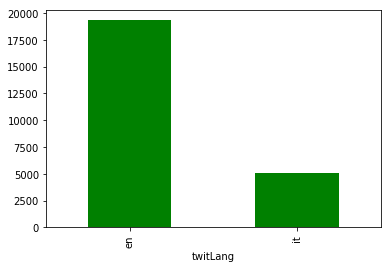

In [25]:
#Chg: For all plots I am renaming variables.
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
grByLang_mean['actor:followersCnt'].plot(kind='bar', color='g')

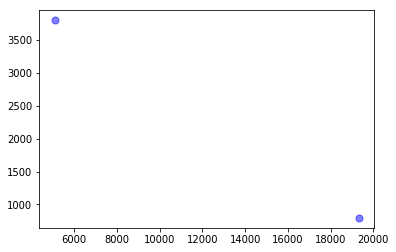

In [31]:
# more base matplotlib. Add new color
plt.scatter(x=grByLang_mean['actor:followersCnt'],\
            y=grByLang_mean['actor:friendsCnt'],\
            alpha=0.5,\
            s=50,\
            color='blue',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8bce99850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8bc90c990>]], dtype=object)

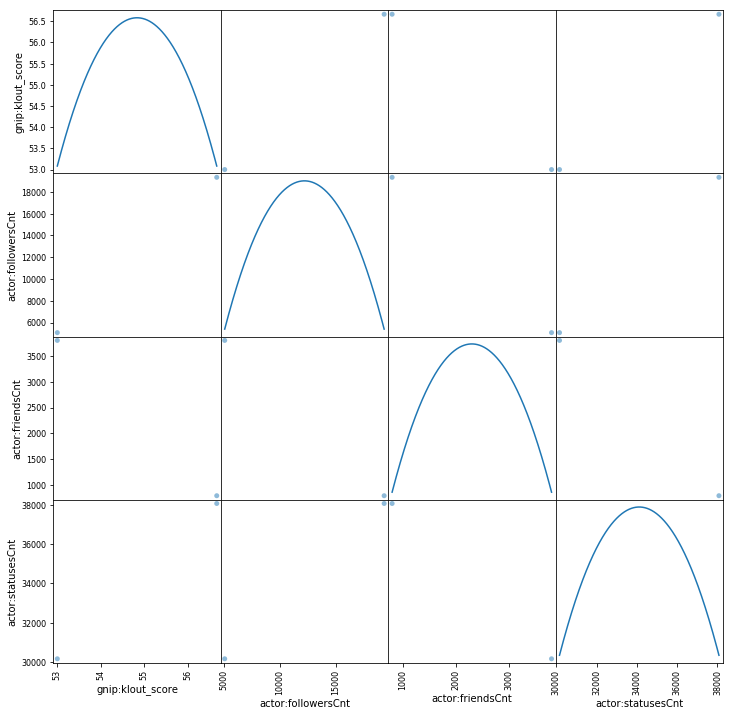

In [32]:
# now read the docs and copypasta a neat-looking plot
from pandas.plotting import scatter_matrix

scatter_matrix(grByLang_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)


Finally, a short taste of some other plotting libraries. My munging + plotting skillz in this world are still a work in progress, so I will definitely return to this section with an actual use-case in the future. For now, we'll make up some data for illustrative purposes.

In [34]:
# make up some data with large-scale patterns and a datetime index
df4 = pd.DataFrame(np.random.randn(2000, 4), index=pd.date_range('12/31/2010', periods=2000), columns=list('QWER'))
df4 = df4.cumsum()
df4.head()

,Q,W,E,R
2010-12-31,-1.722584,0.626541,-0.320802,2.004061
2011-01-01,-1.221754,0.658735,1.822358,2.502067
2011-01-02,-1.163460,0.210190,1.194019,1.142225
2011-01-03,-1.548301,-0.699161,1.135100,0.536360
2011-01-04,-1.537678,-0.652711,2.285528,-1.044882


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8b43f0c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8b4357ad0>]], dtype=object)

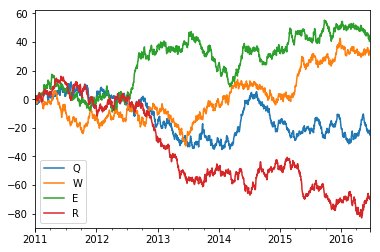

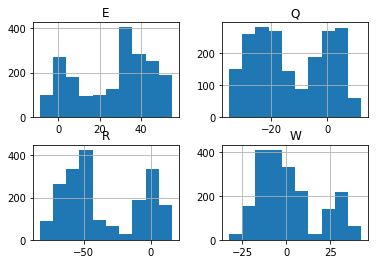

In [35]:
df4.plot()
df4.hist()

Now, let's use some other matplotlib wrappers to get a sense of how we can make this look a little better....

- `prettyplotlib` essentially just fixes a bunch of matplotlib settings behind the scenes so your base methods lead to e.g. ColorBrewer palettes. This essentially overwrites the .matplotlibrc settings for this session with palettes and settings that are slightly nicer. The settings will remain until you start a new session.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8b408f1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8bcbf9910>]], dtype=object)

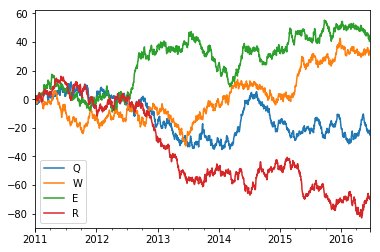

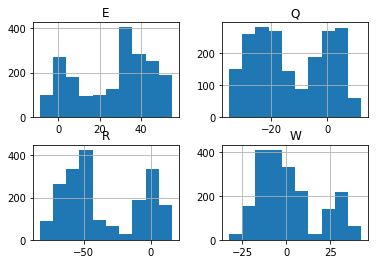

In [36]:
import prettyplotlib

df4.plot()
df4.hist()

# Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the :ref:`categorical plots <categorical_tutorial>` chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [60]:
%matplotlib inline

In [61]:
#Rename sns and plt. Otherwise keep everything as is.
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plot

In [62]:
import seaborn as sea
sea.set(color_codes=True)

In [63]:
np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions
---------------------------------

The most convenient way to take a quick look at a univariate distribution in seaborn is the ***`distplot` function. By default, this will draw a `histogram <https://en.wikipedia.org/wiki/Histogram>`_ and fit a `kernel density estimate <https://en.wikipedia.org/wiki/Kernel_density_estimation>`_ (KDE). 

**Histograms**

Histograms are likely familiar, and a **``hist``** function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the **`rugplot`** function, but it is also available in **`distplot`**:

When drawing histograms, the main choice you have is the number of bins to use and where to place them. **`distplot`** uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

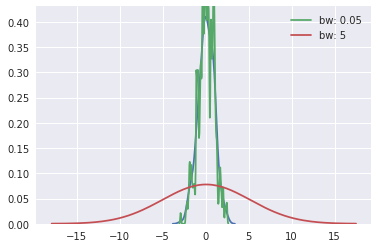

In [67]:
# Keep the last 3 univariate distributions. Don't forget to define the variable x.
#(1)
axis = np.random.normal(size=350)
sea.kdeplot(axis)
sea.kdeplot(axis, bw=.05, label="bw: 0.05")
sea.kdeplot(axis, bw=5, label="bw: 5")
plot.legend();

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It's possible to control how far past the extreme values the curve is drawn with the ``cut`` parameter; however, this only influences how the curve is drawn and not how it is fit:

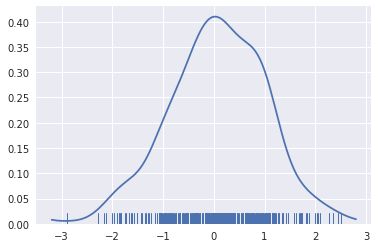

In [68]:
#(2): Minor adjustments:
sea.kdeplot(axis, shade=False, cut=1)
sea.rugplot(axis);

**Fitting parametric distributions**


You can also use **`distplot`** to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

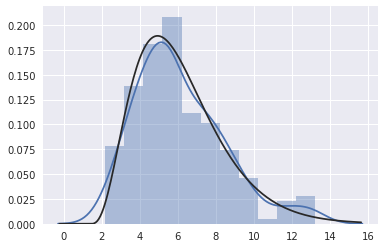

In [92]:
#(3): Minor adjustments:
axis = np.random.gamma(6, size=215)
sea.distplot(axis, kde=True, fit=stats.gamma);

Plotting bivariate distributions
--------------------------------

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the ***`jointplot` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [107]:
mean1, cov1 = [0, 1], [(1, .5), (.5, 1)]
dataMv = np.random.multivariate_normal(mean1, cov1, 300)
dateframe1 = pd.DataFrame(dataMv, columns=["x", "y"])

You can also draw a two-dimensional kernel density plot with the **`kdeplot`** function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the **`jointplot`** function manages its own figure:

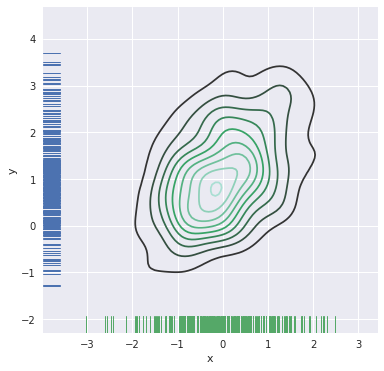

In [86]:
# (1) Adjust variable names.
f, axis2 = plot.subplots(figsize=(6, 6))
sea.kdeplot(dateframe1.x, dateframe1.y, ax=axis2)
sea.rugplot(dateframe1.x, color="g", ax=axis2)
sea.rugplot(dateframe1.y, vertical=True, ax=axis2);

If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

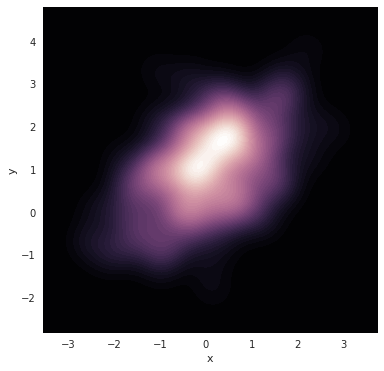

In [83]:
# (2) Adjust variable names.
f, axis2 = plot.subplots(figsize=(6, 6))
cmap = sea.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sea.kdeplot(dateframe1.x, dateframe1.y, cmap=cmap, n_levels=60, shade=True);

The **`jointplot`** function uses a **`JointGrid`** to manage the figure. For more flexibility, you may want to draw your figure by using **`JointGrid`** directly. **`jointplot` returns the **`JointGrid`** object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

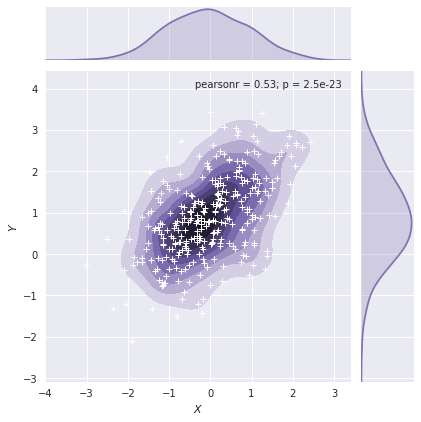

In [110]:
#(3) Chg variable names:
graph = sea.jointplot(x="x", y="y", data=dateframe1, kind="kde", color="m")
graph.plot_joint(plot.scatter, c="w", s=30, linewidth=1, marker="+")
graph.ax_joint.collections[0].set_alpha(0)
graph.set_axis_labels("$X$", "$Y$");

Visualizing pairwise relationships in a dataset
-----------------------------------------------

To plot multiple pairwise bivariate distributions in a dataset, you can use the **`pairplot`** function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

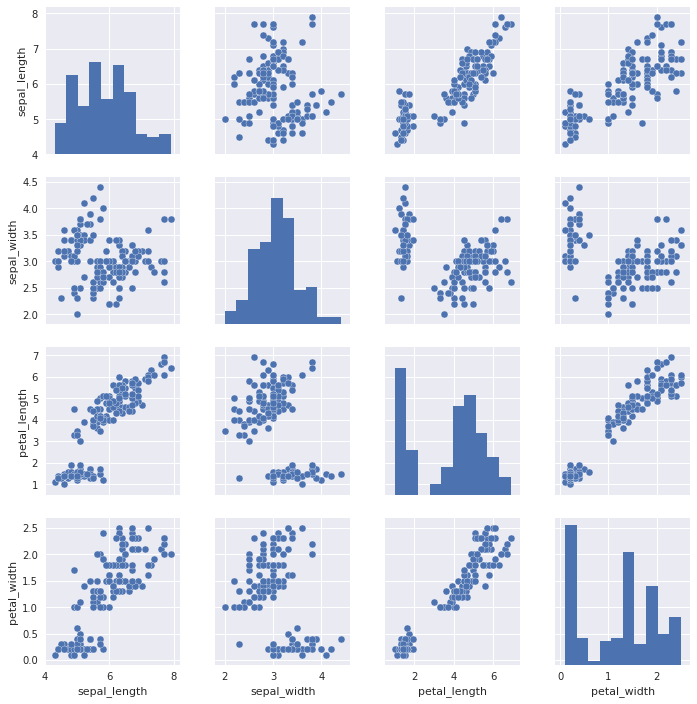

In [113]:
ir = sea.load_dataset("iris")
sea.pairplot(ir);

Much like the relationship between **`jointplot`** and **`JointGrid`**, the **`pairplot`** function is built on top of a **`PairGrid`** object, which can be used directly for more flexibility:

No handlers could be found for logger "matplotlib.legend"
/bda/app/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


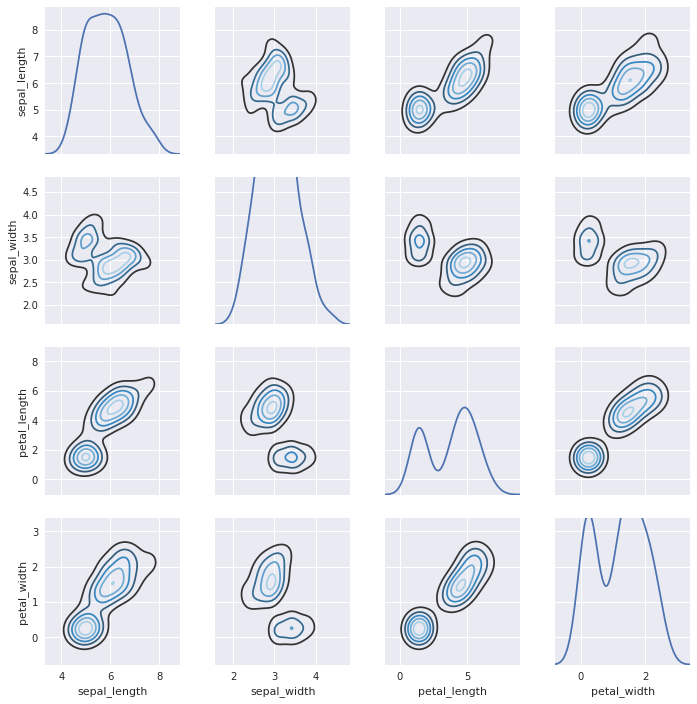

In [112]:
graph = sea.PairGrid(ir)
graph.map_diag(sea.kdeplot)
graph.map_offdiag(sea.kdeplot, cmap="Blues_d", n_levels=5);

# Visualizing linear relationships

In [140]:
#Keep the last 3 graphs. Change variable names with the following 3 graphs.
%matplotlib inline

In [141]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plot2

In [142]:
import seaborn as sea2
sea2.set(color_codes=True)

In [143]:
np.random.seed(sum(map(ord, "regression")))

In [144]:
tip = sea.load_dataset("tips")

Functions to draw linear regression models
------------------------------------------

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, **`regplot`** and **`lmplot`** are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, ``x`` and ``y``, and then fit the regression model ``y ~ x`` and plot the resulting regression line and a 95% confidence interval for that regression:

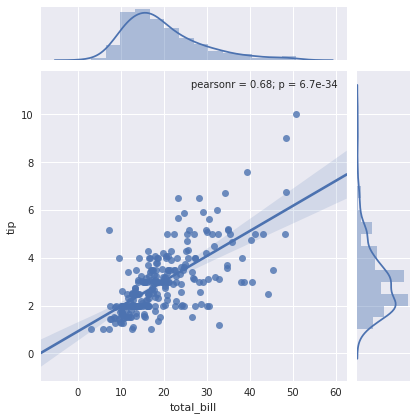

In [145]:
#(1)
sea2.jointplot(x="total_bill", y="tip", data=tip, kind="reg");

Using the **`pairplot`** function with ``kind="reg"`` combines **`regplot`** and **`PairGrid`** to show the linear relationship between variables in a dataset. Take care to note how this is different from **`lmplot`**. In the figure below, the two axes don't show the same relationship conditioned on two levels of a third variable; rather, **`PairGrid`** is used to show multiple relationships between different pairings of the variables in a dataset:

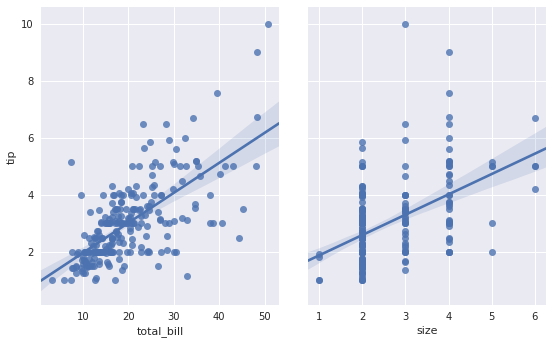

In [146]:
#(2)
sea2.pairplot(tip, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

Like **`lmplot`**, but unlike **`jointplot`**, conditioning on an additional categorical variable is built into **`pairplot`** using the ``hue`` parameter:

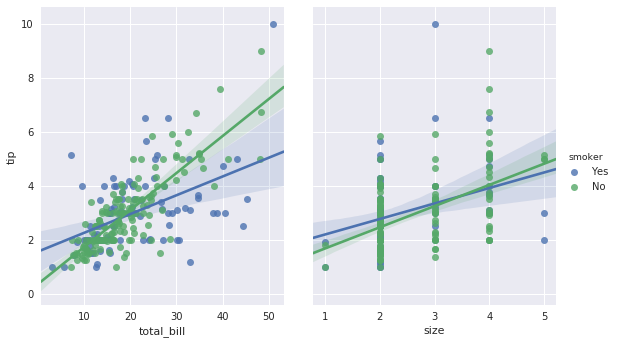

In [131]:
#(3)
sea2.pairplot(tip, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

# Plotting with categorical data

We can use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship.

It's useful to divide seaborn's categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each *distribution* of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions **swarmplot** and **stripplot**, the second includes **boxplot** and **violinplot**, and the third includes **barplot** and **pointplot**. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between **regplot** and **lmplot**, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level **factorplot**, which combines these functions with a **FacetGrid** to apply a categorical plot across a grid of figure panels.


In [126]:
#Change variable names with the following 3 graphs.
%matplotlib inline

In [132]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plot

In [133]:
import seaborn as sea3
sea3.set(style="whitegrid", color_codes=True)

In [134]:
np.random.seed(sum(map(ord, "categorical")))

In [135]:
tip2 = sns.load_dataset("tips")

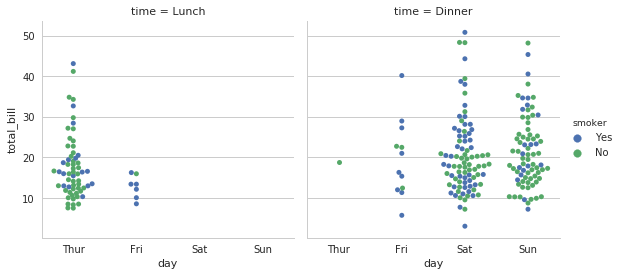

In [136]:
#(1)
sea3.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

Any kind of plot can be drawn. Because of the way :class:`FacetGrid` works, to change the size and shape of the figure you need to specify the ``size`` and ``aspect`` arguments, which apply to each facet:

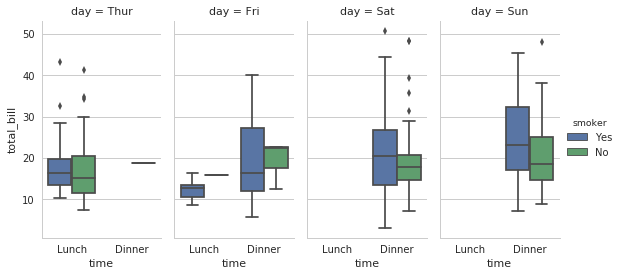

In [137]:
#(2)
sea3.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

It is important to note that you could also make this plot by using ***`boxplot`*** and :class:`FacetGrid` directly. However, special care must be taken to ensure that the order of the categorical variables is enforced in each facet, either by using data with a ``Categorical`` datatype or by passing ``order`` and ``hue_order``.

Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. For example, they are easily combined with a :class:`PairGrid` to show categorical relationships across several different variables:

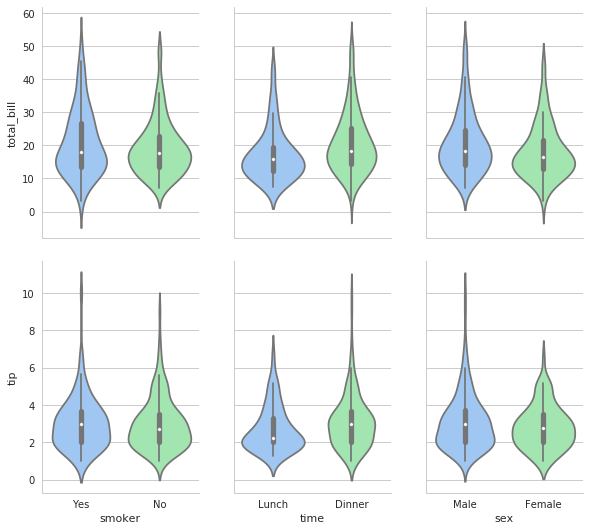

In [139]:
#(3)
g2 = sea3.PairGrid(tips,
              x_vars=["smoker", "time", "sex"],
              y_vars=["total_bill", "tip"],
              aspect=.75, size=3.8)
g2.map(sea3.violinplot, palette="pastel");